In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## First aproach to the data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_passengerid = test_data['PassengerId']

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


## What does the data mean?

   *   PassengerId: unique id number to each passenger
   *   Survived: passenger survive(1) or died(0)
   *   Pclass: passenger class
   *   Name: name
   *   Sex: gender of passenger
   *   Age: age of passenger
   *   SibSp: number of siblings/spouse
   *   Parch: number of parents/children
   *   Tiket: ticket number
   *   Fare: amount of money spent on ticket
   *   Cabin: cabin category
   *   Embarked: port of where passenger embarked (C: Cherbourg, Q: Queenstown, S: Southampton)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Percentage of the data missing
(train_data.isnull().sum()[train_data.isnull().sum()>0] / len(train_data) * 100).round(2)

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

## Variables Analysis

   *   Categorical variables: Survived, Pclass, Sex, SibSp, Parch, Cabin, Embarked, Cabin, Name, Ticket
   
   *   Numerical Variables: PassengerId, Age, Fare

# Variable Analysis

### Categorical

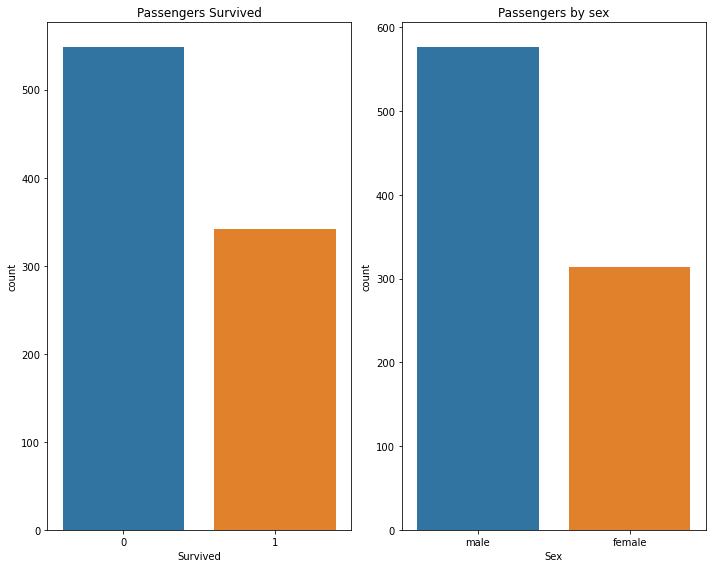

In [8]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
sns.countplot(data=train_data,x='Survived',ax=ax[0])
sns.countplot(data=train_data,x='Sex',ax=ax[1])
ax[0].set_title('Passengers Survived')
ax[1].set_title('Passengers by sex')
plt.tight_layout();

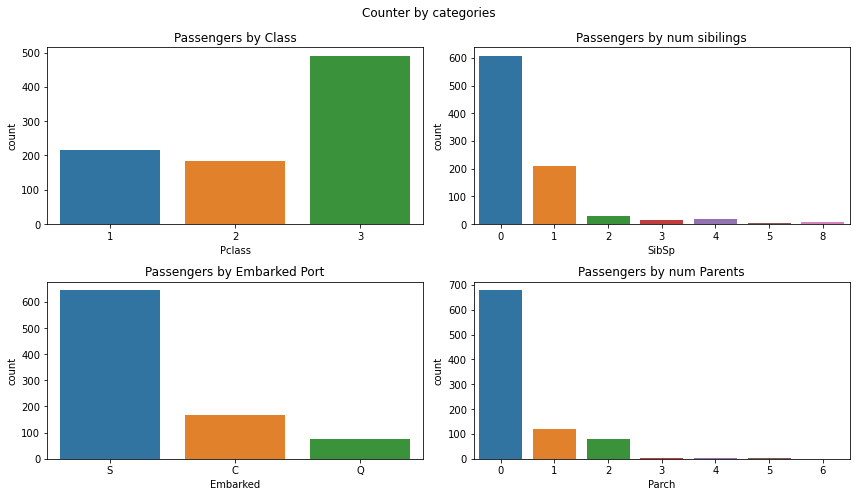

In [9]:
fig,ax = plt.subplots(2,2,figsize=(12,7))
fig.suptitle('Counter by categories')
sns.countplot(data=train_data,x='Pclass',ax=ax[0,0])
sns.countplot(data=train_data,x='Embarked',ax=ax[1,0])
sns.countplot(data=train_data,x='SibSp',ax=ax[0,1])
sns.countplot(data=train_data,x='Parch',ax=ax[1,1])
ax[0,0].set_title('Passengers by Class')
ax[1,0].set_title('Passengers by Embarked Port')
ax[0,1].set_title('Passengers by num sibilings')
ax[1,1].set_title('Passengers by num Parents')

plt.tight_layout();

## Numerical

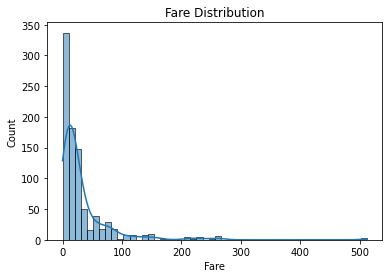

In [10]:
sns.histplot(data=train_data,x='Fare',kde=True,bins=50)
plt.title('Fare Distribution');

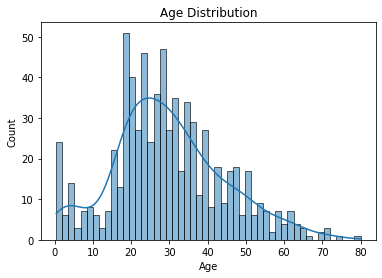

In [11]:
sns.histplot(data=train_data,x='Age',kde=True,bins=50)
plt.title('Age Distribution');

## Variables vs Survived

In [12]:
train_data.groupby('Sex').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Sex,
female,0.74
male,0.19


In [13]:
train_data.groupby('Pclass').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [14]:
train_data.groupby('SibSp').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
SibSp,
1,0.54
2,0.46
0,0.35
3,0.25
4,0.17
5,0.00
8,0.00


In [15]:
train_data.groupby('Parch').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Parch,
3,0.60
1,0.55
2,0.50
0,0.34
5,0.20
4,0.00
6,0.00


In [16]:
train_data.groupby('Embarked').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Embarked,
C,0.55
Q,0.39
S,0.34


## Outliers

## Before outliers

   *   Just drop the most repetitive along the columns (greater than 2)

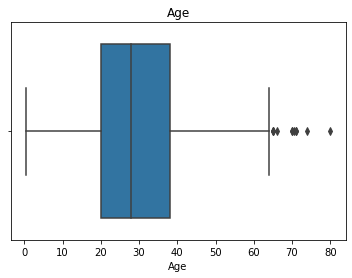

In [17]:
sns.boxplot(data=train_data,x='Age')
plt.title('Age');

In [18]:
q1,q3 = np.nanpercentile(train_data['Age'],[25,75])
IQR = q3 - q1
lim_inferior = q1 - (IQR * 1.5)
lim_superior = q3 + (IQR * 1.5)

In [19]:
print('Lim superior: {0}'.format(lim_superior))
print('Lim inferior: {0}'.format(lim_inferior))
print('IQR: {0}'.format(IQR))
print('Percentil 25: {0}'.format(q1))
print('Percentil 75: {0}'.format(q3))

Lim superior: 64.8125
Lim inferior: -6.6875
IQR: 17.875
Percentil 25: 20.125
Percentil 75: 38.0


In [20]:
#Making a loop
def detecting_outliers(data,features):
    outliers_indices = []
    
    #Selecting the parameters
    for c in features:
        q1,q3= np.nanpercentile(data[c],[25,75])
        IQR = q3 - q1
        lim_inferior = q1 - (IQR * 1.5)
        lim_superior = q3 + (IQR * 1.5)

        #Select outliers indices per column
        outliers_list_col = data[ (data[c] < lim_inferior) | (data[c] > lim_superior)].index
    
        #Collect the column outlier (indices) and add to the list
        outliers_indices.extend(outliers_list_col)
    
    
    outliers_indices = Counter(outliers_indices)    
    multiple_outliers = list(i for i, v in outliers_indices.items() if v > 2)
    
    return multiple_outliers

In [21]:
r = detecting_outliers(train_data,["Age","SibSp","Parch","Fare"])
r

[745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [22]:
train_data.loc[r]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [23]:
len(train_data)

891

In [24]:
train_data = train_data.drop(axis=0,labels=r)

In [25]:
len(train_data)

880

*  We´ve just drop the values who appear on 3 out of 4 columns 

## Missing values fot all data (both train and test)

In [26]:
train_data['train_test'] = 1
test_data['train_test'] = 0

all_data = pd.concat([train_data,test_data])

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [27]:
all_data.isnull().sum()[all_data.isnull().sum() > 0].sort_values()

Fare           1
Embarked       2
Age          256
Survived     418
Cabin       1007
dtype: int64

### Null - values for "Embarked"

In [28]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [29]:
all_data[(all_data['Sex'] == 'female') & (all_data['Age'] >= 30) & (all_data['Pclass'] == 1)]['Embarked'].value_counts()

C    47
S    39
Q     2
Name: Embarked, dtype: int64

In [30]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

###  Null-values for "Fare"

In [31]:
all_data[all_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [32]:
all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] >= 3)]['Fare'].mean().round()

14.0

In [33]:
all_data['Fare'] = all_data['Fare'].fillna(all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] >= 3)]['Fare'].mean().round())

## Viz

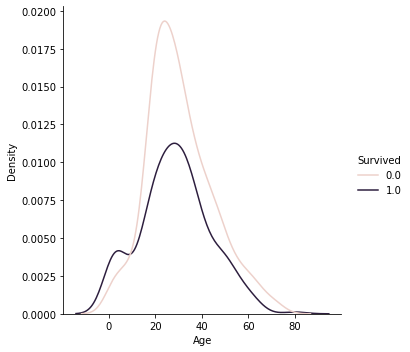

In [34]:
sns.displot(data=all_data,x='Age',hue='Survived',kind='kde')

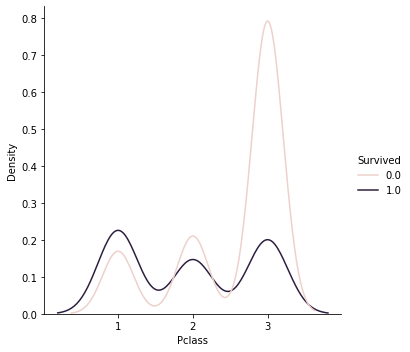

In [35]:
sns.displot(data=all_data,x='Pclass',hue='Survived',kind='kde')
plt.xticks([1,2,3]);

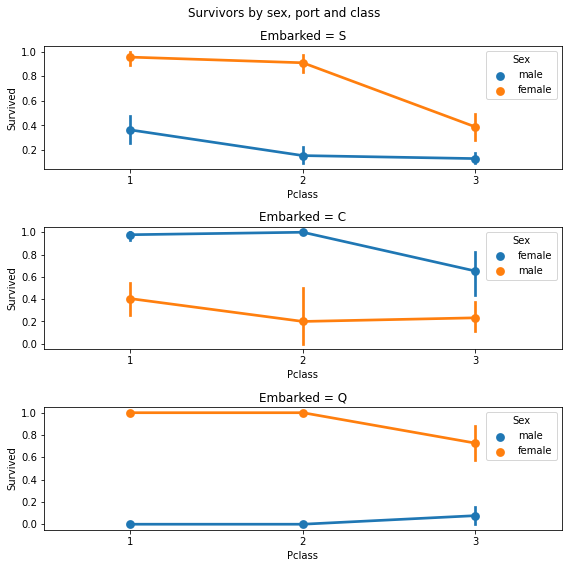

In [36]:
fig,ax = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('Survivors by sex, port and class')
sns.pointplot(data=all_data[all_data['Embarked']=='S'],x='Pclass',y='Survived',hue='Sex',ax=ax[0])
sns.pointplot(data=all_data[all_data['Embarked']=='C'],x='Pclass',y='Survived',hue='Sex',ax=ax[1])
sns.pointplot(data=all_data[all_data['Embarked']=='Q'],x='Pclass',y='Survived',hue='Sex',axax=[2])
ax[0].set_title('Embarked = S')
ax[1].set_title('Embarked = C')
ax[2].set_title('Embarked = Q')
plt.tight_layout();

### Null values for age

### Looking for correlations

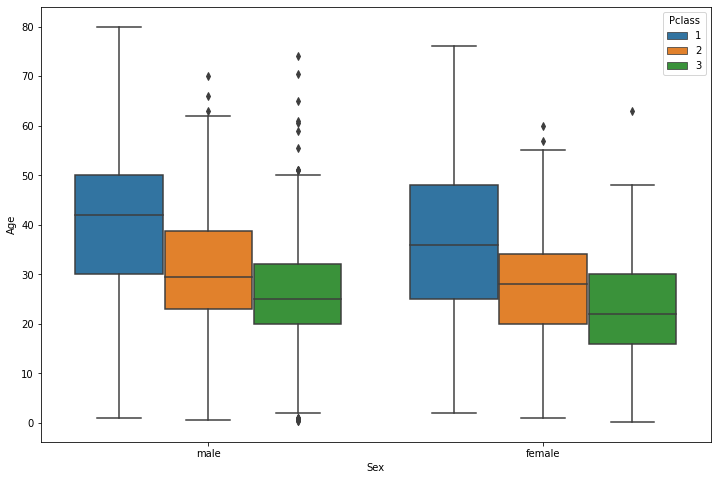

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_data,x='Sex',y='Age',hue='Pclass');

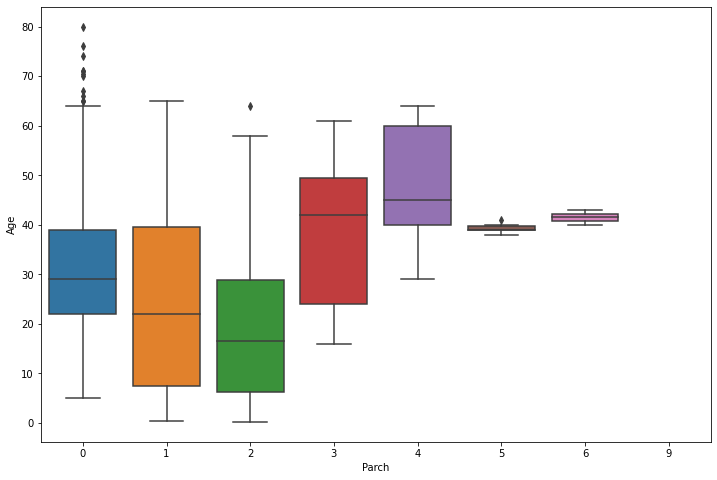

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_data,x='Parch',y='Age');

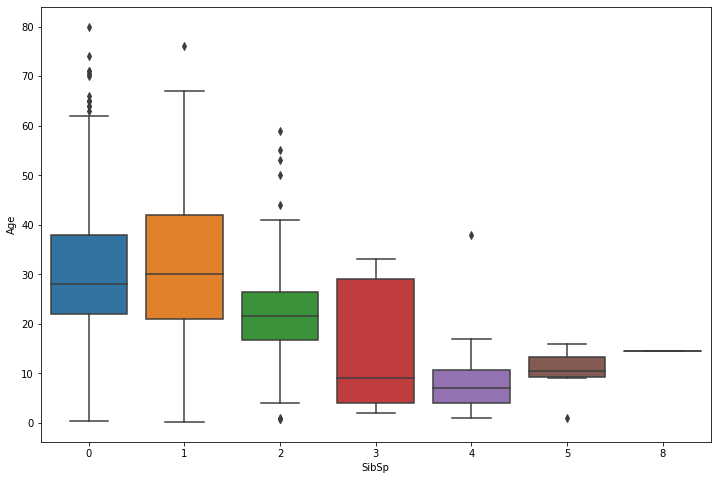

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_data,x='SibSp',y='Age');

In [40]:
all_data['Sex'] = all_data['Sex'].map({'male':1, 'female':0})

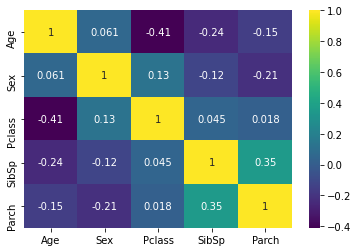

In [41]:
sns.heatmap(data=all_data[['Age','Sex','Pclass','SibSp','Parch']].corr(),cmap='viridis',annot=True);

### Copies from the data to viz the techiniques (from all_data)

In [42]:
copy_mean = all_data.copy()
copy_median = all_data.copy()
copy_loop = all_data.copy()
copy_knn = all_data.copy()

## Age dist by Filled technique

In [43]:
#Rows (index from the Nan values on "Age")
# Porque son los más correlacionados con "Age"

#Index de las personas con null-value en "Age"
rows_nan_age = list(copy_loop['Age'][copy_loop['Age'].isnull()].index)


for i in rows_nan_age:
    #Calcular la edad de las personas que tengan los mismos valores en
    # Sibilings, Pclass y Parents
    
    age_pred = copy_loop['Age'][((copy_loop['SibSp'] == copy_loop.iloc[i]['SibSp']) &
                          (copy_loop['Parch'] == copy_loop.iloc[i]['Parch']) &
                          (copy_loop['Pclass'] == copy_loop.iloc[i]['Pclass']))].median()
    
    age_med = copy_loop['Age'].median()
    
    #all_data['Age'].iloc[i] = age_pred
    if not np.isnan(age_pred):
        copy_loop['Age'].loc[i] = age_pred
    else:
        copy_loop['Age'].loc[i] = age_med

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [44]:
copy_mean['Age'] = copy_mean['Age'].fillna(copy_mean['Age'].mean())

copy_median['Age'] = copy_median['Age'].fillna(copy_median['Age'].median())

# Feature Engenieering

## Maybe I can extract more Info from other variables

   *  Also for the last technique for the null values (KNN Inputation)

### Name

In [45]:
copy_knn['Name Title'] = copy_knn['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
copy_knn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Name Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [46]:
copy_knn['Name Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Sir               1
Mme               1
Lady              1
Don               1
Dona              1
the Countess      1
Name: Name Title, dtype: int64

In [47]:
#Get the titles (Mr, Miss, Mrs, etc...)
titles = copy_knn['Name Title'].value_counts()[copy_knn['Name Title'].value_counts() < 65].index

#If the value is lower than 40, then we'll grouped on a category named "Other"
copy_knn['Name Title'] = copy_knn['Name Title'].apply(lambda x: 'Other' if x in titles else x)

#See the results
copy_knn['Name Title'].value_counts()

Mr       753
Miss     255
Mrs      197
Other     93
Name: Name Title, dtype: int64

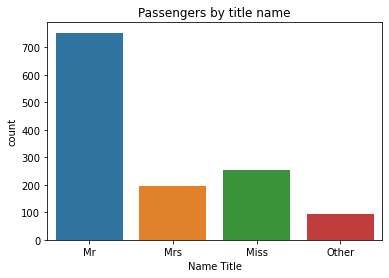

In [48]:
sns.countplot(data=copy_knn,x='Name Title')
plt.title('Passengers by title name');

In [49]:
copy_knn.groupby('Name Title').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Name Title,
Mrs,0.79
Miss,0.71
Other,0.54
Mr,0.16


In [50]:
copy_knn.drop('Name',axis=1,inplace=True)

### Ticket

In [51]:
copy_knn['Ticket Numeric'] = copy_knn['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

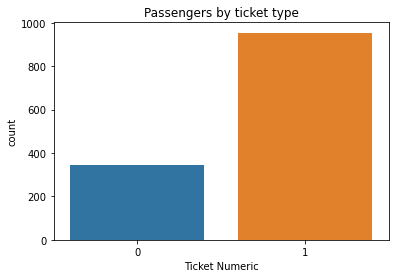

In [52]:
sns.countplot(data=copy_knn, x='Ticket Numeric')
plt.title('Passengers by ticket type');

In [53]:
copy_knn.groupby('Ticket Numeric').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Ticket Numeric,
0,0.40
1,0.38


### Family Size

In [54]:
#We add "+1" because we are counting the actuall row
copy_knn['Fam Size'] = copy_knn['SibSp'] + copy_knn['Parch'] + 1

<AxesSubplot:xlabel='Fam Size', ylabel='count'>

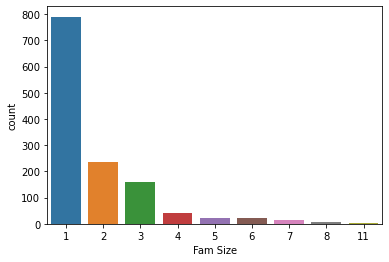

In [55]:
sns.countplot(data=copy_knn,x='Fam Size')

In [56]:
copy_knn.groupby('Fam Size').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

,Survived
Fam Size,
4,0.72
3,0.58
2,0.55
7,0.33
1,0.30
5,0.20
6,0.05
8,0.00
11,nan


In [57]:
copy_knn.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Name Title,Ticket Numeric,Fam Size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1,Mrs,1,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,1,Mr,1,1


In [58]:
copy_knn.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Sex                  0
Age                256
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1007
Embarked             0
train_test           0
Name Title           0
Ticket Numeric       0
Fam Size             0
dtype: int64

### Dummie Variables

In [59]:
copy_knn = pd.get_dummies(copy_knn,columns=['Name Title','Embarked'])
copy_knn.drop(['Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [60]:
copy_knn.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train_test,Ticket Numeric,Fam Size,Name Title_Miss,Name Title_Mr,Name Title_Mrs,Name Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,22.0,1,0,7.2500,1,0,2,0,1,0,0,0,0,1
1,1.0,1,0,38.0,1,0,71.2833,1,0,2,0,0,1,0,1,0,0
2,1.0,3,0,26.0,0,0,7.9250,1,0,1,1,0,0,0,0,0,1
3,1.0,1,0,35.0,1,0,53.1000,1,1,2,0,0,1,0,0,0,1
4,0.0,3,1,35.0,0,0,8.0500,1,1,1,0,1,0,0,0,0,1


In [61]:
copy_knn.isnull().sum()[copy_knn.isnull().sum() > 0]

Survived    418
Age         256
dtype: int64

### KNN Imputer

  * I don´t want to fill both the "Survived" and the "Age" column, later I'll  predict that value
  * I need to select only for 'Age'

In [62]:
copy_knn.loc[:,'Pclass':]

,Pclass,Sex,Age,SibSp,Parch,Fare,train_test,Ticket Numeric,Fam Size,Name Title_Miss,Name Title_Mr,Name Title_Mrs,Name Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,1,0,2,0,1,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,2,0,0,1,0,1,0,0
2,3,0,26.0,0,0,7.9250,1,0,1,1,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,1,1,2,0,0,1,0,0,0,1
4,3,1,35.0,0,0,8.0500,1,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0,0,1,0,1,0,0,0,0,1
414,1,0,39.0,0,0,108.9000,0,0,1,0,0,0,1,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1,0,1,0,0,0,0,1
416,3,1,NaN,0,0,8.0500,0,1,1,0,1,0,0,0,0,1


In [63]:
from sklearn.impute import KNNImputer
impute_knn =  KNNImputer(n_neighbors=3,missing_values=np.nan)
copy_knn_complete = pd.DataFrame(impute_knn.fit_transform(copy_knn.loc[:,'Pclass':]))
copy_knn_complete.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.0,1.0,22.000000,1.0,0.0,7.2500,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,38.000000,1.0,0.0,71.2833,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,35.000000,1.0,0.0,53.1000,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3.0,1.0,35.000000,0.0,0.0,8.0500,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,3.0,1.0,54.833333,0.0,0.0,8.4583,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.0,54.000000,0.0,0.0,51.8625,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,3.0,1.0,2.000000,3.0,1.0,21.0750,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,3.0,0.0,27.000000,0.0,2.0,11.1333,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,2.0,0.0,14.000000,1.0,0.0,30.0708,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [64]:
columns = copy_knn.columns[1:]
indexes_cols = np.linspace(0,len(columns)-1,len(columns)).astype('int64')
col_dict = dict(zip(indexes_cols,columns))
col_dict

{0: 'Pclass',
 1: 'Sex',
 2: 'Age',
 3: 'SibSp',
 4: 'Parch',
 5: 'Fare',
 6: 'train_test',
 7: 'Ticket Numeric',
 8: 'Fam Size',
 9: 'Name Title_Miss',
 10: 'Name Title_Mr',
 11: 'Name Title_Mrs',
 12: 'Name Title_Other',
 13: 'Embarked_C',
 14: 'Embarked_Q',
 15: 'Embarked_S'}

In [65]:
copy_knn_complete.rename(mapper=col_dict,axis=1,inplace=True)
copy_knn_complete.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,train_test,Ticket Numeric,Fam Size,Name Title_Miss,Name Title_Mr,Name Title_Mrs,Name Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,3.0,1.0,22.000000,1.0,0.0,7.2500,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,38.000000,1.0,0.0,71.2833,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,35.000000,1.0,0.0,53.1000,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3.0,1.0,35.000000,0.0,0.0,8.0500,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,3.0,1.0,54.833333,0.0,0.0,8.4583,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.0,54.000000,0.0,0.0,51.8625,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,3.0,1.0,2.000000,3.0,1.0,21.0750,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,3.0,0.0,27.000000,0.0,2.0,11.1333,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,2.0,0.0,14.000000,1.0,0.0,30.0708,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


##### I already have the values for "age", so I just get into the original set (with the Survived column)

In [66]:
copy_knn['Age'] = copy_knn_complete['Age']
copy_knn.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train_test,Ticket Numeric,Fam Size,Name Title_Miss,Name Title_Mr,Name Title_Mrs,Name Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,22.000000,1,0,7.2500,1,0,2,0,1,0,0,0,0,1
1,1.0,1,0,38.000000,1,0,71.2833,1,0,2,0,0,1,0,1,0,0
2,1.0,3,0,26.000000,0,0,7.9250,1,0,1,1,0,0,0,0,0,1
3,1.0,1,0,35.000000,1,0,53.1000,1,1,2,0,0,1,0,0,0,1
4,0.0,3,1,35.000000,0,0,8.0500,1,1,1,0,1,0,0,0,0,1
5,0.0,3,1,54.833333,0,0,8.4583,1,1,1,0,1,0,0,0,1,0
6,0.0,1,1,54.000000,0,0,51.8625,1,1,1,0,1,0,0,0,0,1
7,0.0,3,1,2.000000,3,1,21.0750,1,1,5,0,0,0,1,0,0,1
8,1.0,3,0,27.000000,0,2,11.1333,1,1,3,0,0,1,0,0,0,1
9,1.0,2,0,14.000000,1,0,30.0708,1,1,2,0,0,1,0,1,0,0


In [67]:
copy_knn.isnull().sum()[copy_knn.isnull().sum() > 0]

Survived    418
dtype: int64

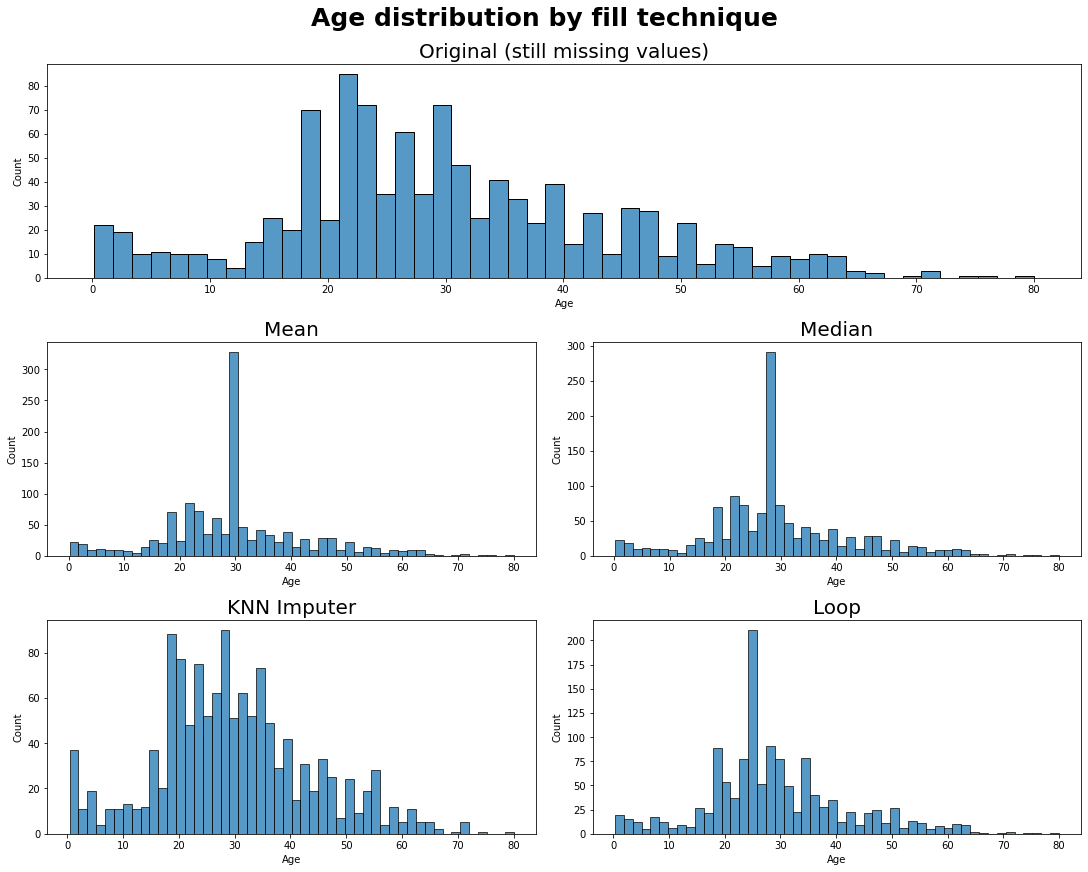

In [68]:
fig = plt.figure(constrained_layout=True,figsize=(15,12))
gs = fig.add_gridspec(3,2)
fig.suptitle('Age distribution by fill technique',fontsize=25,fontweight='bold')

fig_ax1 = fig.add_subplot(gs[0, :])
sns.histplot(data=all_data,x='Age',bins=50,ax=fig_ax1)
fig_ax1.set_title('Original (still missing values)',fontsize=20)


fig_ax2 = fig.add_subplot(gs[1, 1:])
sns.histplot(data=copy_median,x='Age',bins=50,ax=fig_ax2)
fig_ax2.set_title('Median',fontsize=20)

fig_ax3 = fig.add_subplot(gs[1, :1])
sns.histplot(data=copy_mean,x='Age',bins=50,ax=fig_ax3)
fig_ax3.set_title('Mean',fontsize=20)

fig_ax4 = fig.add_subplot(gs[2, 1:])
sns.histplot(data=copy_loop,x='Age',bins=50,ax=fig_ax4)
fig_ax4.set_title('Loop',fontsize=20)

fig_ax5 = fig.add_subplot(gs[2, :1]);
sns.histplot(data=copy_knn,x='Age',bins=50,ax=fig_ax5)
fig_ax5.set_title('KNN Imputer',fontsize=20)

plt.savefig('C:\\Users\\carlo\\Desktop\\Titanic Technique.jpg');

## Split the data

In [69]:
train = copy_knn[copy_knn['train_test'] == 1].drop('train_test',axis=1)
X = train.drop('Survived',axis=1)
y = train['Survived']


test = copy_knn[copy_knn['train_test'] == 0].drop('train_test',axis=1)
test.drop('Survived',axis=1,inplace=True)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GridModel Log

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [84]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

rf_param_grid = {"max_features": [1,3,4,5,10],
                "min_samples_split":[2,3,5,7,10],
                "min_samples_leaf":[1,3,5,7,10],
                "bootstrap":[False],
                "n_estimators":[64,100,128,300],
                "criterion":["gini"]}

param_grid = {'n_estimators':n_estimators, 'max_features':max_features,
             'bootstrap':bootstrap, 'oob_score':oob_score}



rfc = RandomForestClassifier()

In [85]:
grid_search = GridSearchCV(estimator=rfc, param_grid=rf_param_grid)

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_features': [1, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 7, 10],
                         'n_estimators': [64, 100, 128, 300]})

In [87]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
y_preds = grid_search.predict(X_test)

In [89]:
accuracy_score(y_test,y_preds)* 100

77.65151515151516

In [90]:
test_survived = pd.Series(grid_search.predict(test),name='Survived').astype('int64')
results = pd.concat([test_passengerid,test_survived],axis=1)
results.to_csv('titanic.csv',index=False)